## MLP using Sklearn

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import numpy
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import IPython
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [8]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [10]:
# Normalization

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),
                    max_iter=1000, 
                    verbose=0,
                    batch_size=100)

mlp.fit(X_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.73828125
[[139  28]
 [ 39  50]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       167
         1.0       0.64      0.56      0.60        89

    accuracy                           0.74       256
   macro avg       0.71      0.70      0.70       256
weighted avg       0.73      0.74      0.73       256



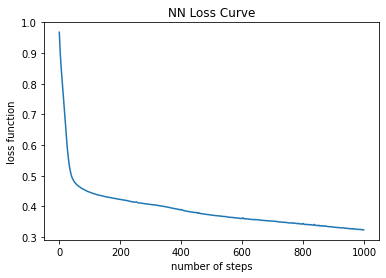

In [13]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [14]:
mlp.intercepts_[0]

array([-0.58392737,  0.1177551 , -0.21731727,  0.45480559,  0.69487303,
       -0.67481645, -0.33766931,  0.15824506,  0.47809894,  0.63057117])

In [15]:
mlp.coefs_[0]

array([[-0.70502844,  0.78713809, -0.16104415,  0.3556704 ,  0.64559519,
         0.21211159,  0.08758923, -0.77332581, -0.39497254, -0.19971285],
       [ 0.20493948,  0.47013485, -0.10914465, -0.76574407, -0.50331258,
         0.6785499 ,  0.01467052, -0.11790981,  0.80029818, -0.85204976],
       [-0.30611196,  0.27697492, -1.00370229,  0.04985472, -0.08757646,
        -0.4692314 ,  0.13897051,  0.31636336, -0.48744252,  0.31572272],
       [-0.13785464,  0.12785528, -0.0379257 , -0.09211097,  0.11937955,
        -0.40338677,  0.41962694, -0.63614566,  0.08623591,  0.01901726],
       [-0.15659178, -0.16126534,  0.43870613, -0.34707907, -0.44815636,
         0.54137115, -0.0439324 ,  0.6001218 , -0.21152992,  0.03423356],
       [-0.30711369, -0.23232608,  0.07489448, -0.19816283, -0.07669955,
        -0.82017582, -0.41964446, -0.71156239,  0.81609966, -0.20367816],
       [ 0.95890333,  0.3240364 , -0.79384975, -0.10578041, -0.38676252,
        -0.0860085 ,  0.91705492,  0.57356826

## MLP using keras

In [16]:
# create keras model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


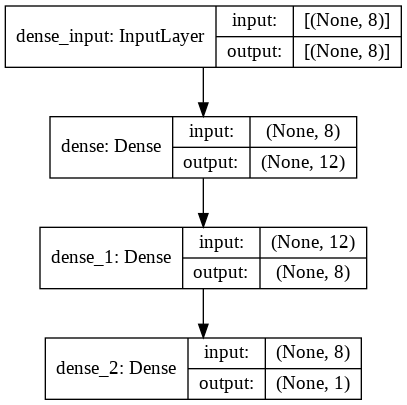

In [19]:
#conda install pydot pydotplus

plot_model(model, to_file='model.png',show_shapes=True)
IPython.display.Image("model.png")

In [21]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model

history=model.fit(X_train, y_train, validation_split=0.25, epochs=80, batch_size=100)
# calculate predictions

Epoch 1/80
4/4 [==============================] - 14s 169ms/step - loss: 0.6930 - acc: 0.5243 - val_loss: 0.6926 - val_acc: 0.6172
Epoch 2/80
4/4 [==============================] - 0s 11ms/step - loss: 0.6923 - acc: 0.6659 - val_loss: 0.6921 - val_acc: 0.6172
Epoch 3/80
4/4 [==============================] - 0s 9ms/step - loss: 0.6915 - acc: 0.6699 - val_loss: 0.6915 - val_acc: 0.6172
Epoch 4/80
4/4 [==============================] - 0s 9ms/step - loss: 0.6910 - acc: 0.6479 - val_loss: 0.6909 - val_acc: 0.6172
Epoch 5/80
4/4 [==============================] - 0s 8ms/step - loss: 0.6901 - acc: 0.6569 - val_loss: 0.6903 - val_acc: 0.6172
Epoch 6/80
4/4 [==============================] - 0s 9ms/step - loss: 0.6896 - acc: 0.6366 - val_loss: 0.6896 - val_acc: 0.6172
Epoch 7/80
4/4 [==============================] - 0s 8ms/step - loss: 0.6885 - acc: 0.6482 - val_loss: 0.6888 - val_acc: 0.6172
Epoch 8/80
4/4 [==============================] - 0s 9ms/step - loss: 0.6865 - acc: 0.6849 - val_los

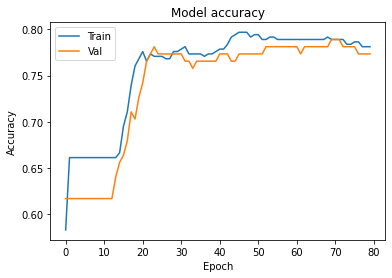

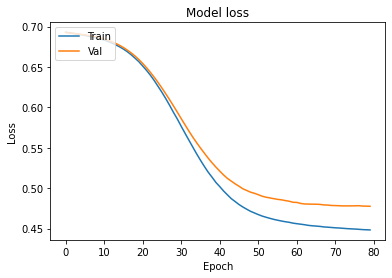

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.26757416,  0.15358804, -0.06068128, -0.2649011 , -0.15410304,
         0.15295765, -0.04570947,  0.1447634 ,  0.12956055, -0.17442568,
        -0.23751009,  0.19087443],
       [-0.305411  ,  0.35174376, -0.3631368 , -0.3400286 , -0.36629838,
         0.35024112, -0.3501676 ,  0.32235393,  0.35435694, -0.35373804,
        -0.3037655 ,  0.30681133],
       [-0.08243053, -0.10235246, -0.02058882,  0.09503436,  0.04671215,
        -0.13738747,  0.01924309, -0.13599946, -0.1291728 , -0.02651839,
         0.04192321, -0.13645484],
       [ 0.01851084,  0.01675061, -0.16176552,  0.1858314 , -0.08964789,
        -0.01886376, -0.08635856, -0.04218011, -0.02403625, -0.15669857,
         0.05171534,  0.04657638],
       [ 0.01411443, -0.04059646, -0.22088891,  0.01899365, -0.18283975,
        -0.04122522, -0.30709913, -0.04111297, -0.02736277, -0.03007042,
        -0.2513891 , -0.00989889],
       [-0.15234198,  0.1857503 , -0.25731936, -0.14808431, -0.24525853,
         0.21920104, 

In [27]:
predictions = model.predict(X_test)  
p_labels = [round(x[0]) for x in predictions]

In [28]:
print("Accuracy", metrics.accuracy_score(y_test, p_labels))
print(confusion_matrix(y_test,p_labels))  
print(classification_report(y_test,p_labels))  

Accuracy 0.75
[[142  25]
 [ 39  50]]
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82       167
         1.0       0.67      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.73      0.71      0.71       256
weighted avg       0.74      0.75      0.74       256

